## <center>  Klein's j-function</center>

In this IPython Notebook we illustrate the [Klein's  j-function](http://en.wikipedia.org/wiki/J-invariant),  evaluated  in Python [`mpmath`](http://www.mpmath.org), and plotted with `matplotlib`, using different color functions for [domain coloring](http://nbviewer.ipython.org/github/empet/Math/blob/master/DomainColoring.ipynb) method:  the default  color function  for `cplot` in `mpmath` (i.e. using the HSL color model)  or user-defined  color functions, such as `color_hsv`, `color_phase` ([phaseplot](http://arxiv.org/pdf/1007.2295v1.pdf)), and `color_cont` (log modulus  contour  plot).

We list below the color functions to be set in [`mpmath.cplot`](http://mpmath.org/doc/current/plotting.html?highlight=cplot#mpmath.cplot):

In [3]:
import matplotlib.pyplot as plt 
from mpmath import * 
from colorsys import hsv_to_rgb, hls_to_rgb

In [4]:
plt.rcParams['figure.figsize'] = 8, 8

In [5]:
pi = 3.1415926535898

In [6]:
def hue(z): # hue value corresponding to a complex number
    h = (float(arg(z)) + pi) / (2*pi) 
    return (h + 0.5) % 1.0 


In [7]:
def color_hsv (fz):
    if isinf(fz):
        return (1.0, 1.0, 1.0)
    if isnan(fz):
        return (0.9, 0.9, 0.9)
    h=hue(fz)
    m=fabs(fz)
    v=(1-1.0/(1+m**2))**0.2#brightness value    
    return  hsv_to_rgb(h, 0.9, v)# s=0.9 is saturation

In [8]:
def color_phase (fz):
    if isinf(fz):
        return (1, 1, 1)
    elif isnan(fz):
        return (0.9, 0.9, 0.9)
    else: 
        return  hsv_to_rgb(hue(fz), 1, 1)

In [9]:
def PerFract(x, t, m, M):
    x=x/t
    return m+(M-m)*(x-floor(x))  

def color_cont(fz):  
    if isinf(fz):
        return (1, 1, 1)
    if isnan(fz):
        return (0.9, 0.9, 0.9)
    
    n=12  #n is the number of rays drawn in a cycle
    
    h=hue(fz)
    modul=fabs(fz)
    Logm=log(modul) 
    v=PerFract(Logm, 2*pi/n, 0.7, 1)

    return  hsv_to_rgb(h, 1, v)

Now calling the function `cplot`:


`cplot(lambda q: kleinj(qbar=q), [-1,1], [-1,1],color=color_function, verbose=True,\`
       `points=100000, file='FileName.png')`

or

`cplot(lambda t: kleinj(tau=t), [-1,2], [0,1.5], color=color_function,verbose=True,\`
      `points=100000, file='ImageName.png')`

with color_function replaced by one of the above defined color functions one gets an image
of Klein's j-function, like those displayed below.


For each plot  the keyword `points` in  `cplot` is set to 100000, except for `kleinjCont.png` where `points=200000`. 

The images displayed below can be found on
[github](https://github.com/empet/Math/blob/master/Imags/kleinj-imgs-git.zip).

In [1]:
from IPython.display import Image

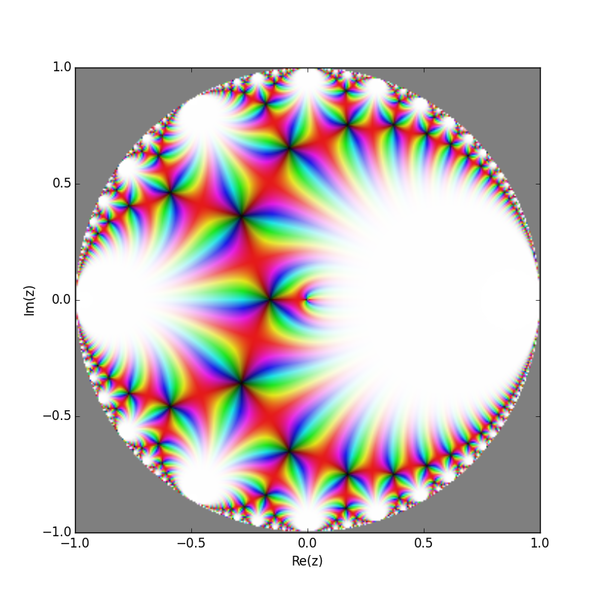

In [2]:
Image(filename='Imags/kleinjHLS.png')

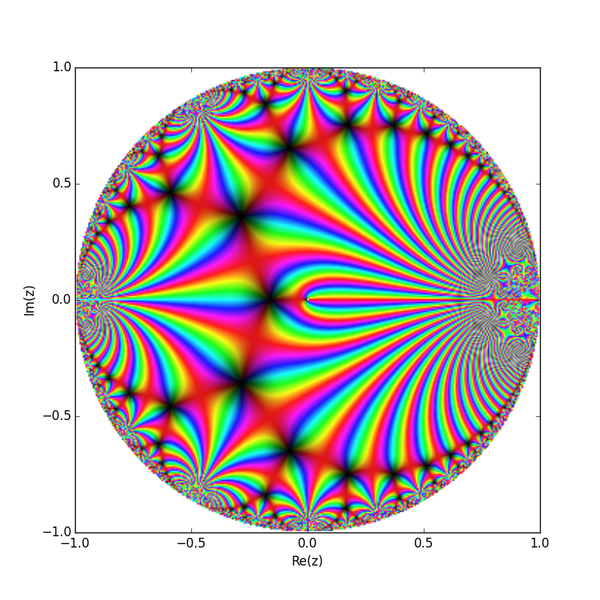

In [3]:
Image(filename='Imags/kleinjHSV.png')

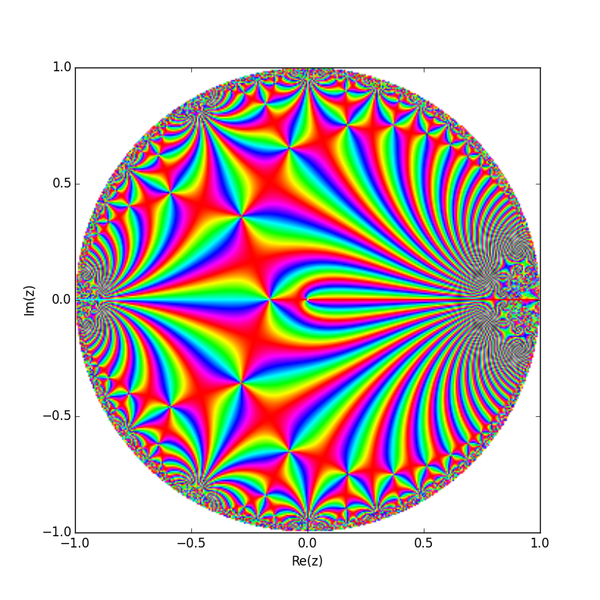

In [8]:
Image(filename='Imags/kleinjPhase.png')

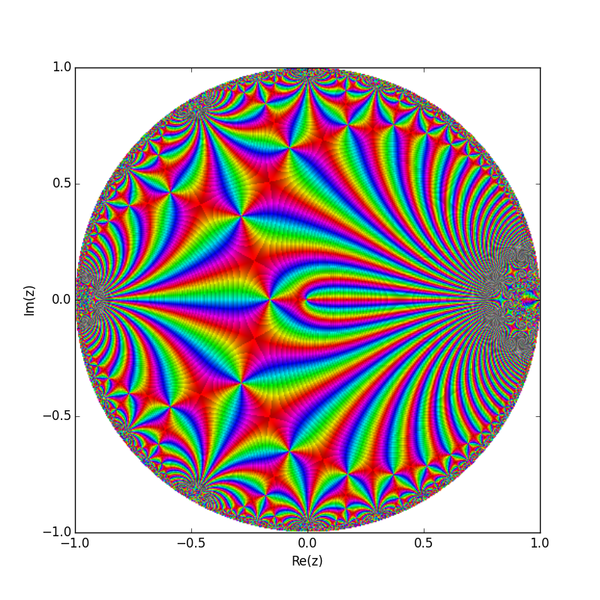

In [9]:
Image(filename='Imags/kleinjCont.png')

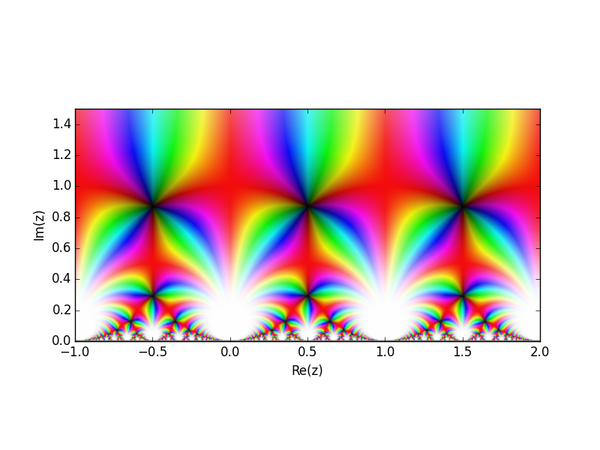

In [10]:
Image(filename='Imags/kleinjtauHLS.png')

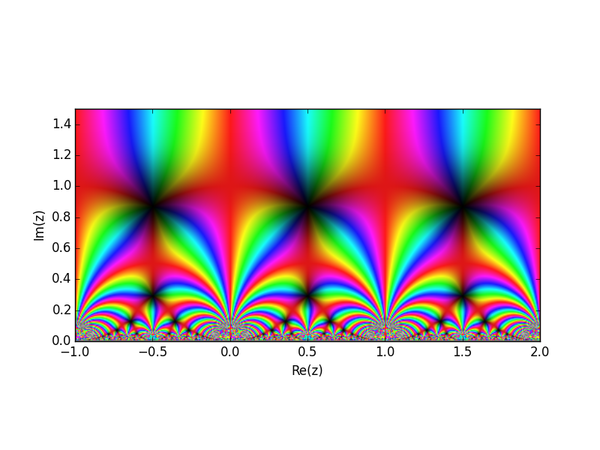

In [11]:
Image(filename='Imags/kleinjtauHSV.png')

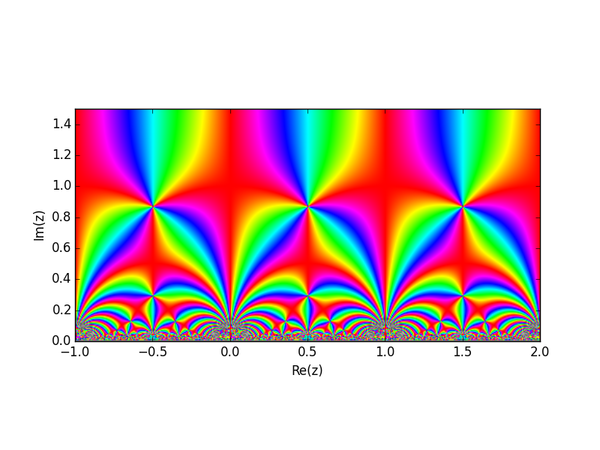

In [12]:
Image(filename='Imags/kleinjtauPhase.png')

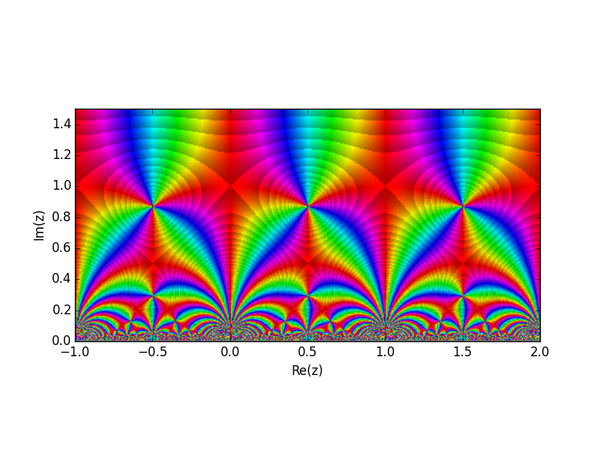

In [13]:
Image(filename='Imags/kleinjtauCont.png')

Similar plots for a few special functions  we posted on Wikipedia:
-  [Riemann zeta function](http://en.wikipedia.org/wiki/Riemann_zeta_function) (September 18, 2014).    
Here is the generating [code](http://nbviewer.ipython.org/gist/empet/df1181a71c3c04660100);
- [Jacobi elliptic functions](http://en.wikipedia.org/wiki/Jacobi_elliptic_functions) (March 8, 2015).
- [Complex Fresnel integrals S(z),   and C(z)](http://en.wikipedia.org/wiki/Fresnel_integral) (March 8, 2015).

Emilia  Petrisor,  [@mathinpython](https://twitter.com/mathinpython) 

In [18]:
from IPython.core.display import HTML
def  css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()